In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
from collections import Counter
from scipy.stats import chisquare

def is_uniformly_distributed(numbers):
    expected_frequency = len(numbers) / len(set(numbers))
    observed_frequency, _ = np.histogram(numbers, bins=len(set(numbers)))
    return chisquare(observed_frequency, f_exp=expected_frequency)

In [ ]:
timing = pd.read_csv('timing_results.csv')
timing.head()

,n,Function,Time
0,10000,LCG,0.000034
1,10000,MersenneTwister,0.000204
2,10000,Xorshift,0.000079
3,10000,RDRand,0.002016
4,100000,LCG,0.000392


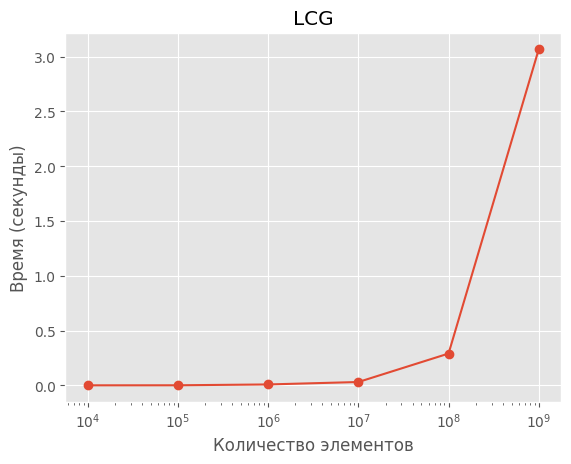

Минимальное время: 3.36e-05 секунд
Максимальное время: 3.06744 секунд


In [ ]:
lcg_timing = timing[timing['Function'] == 'LCG']

plt.plot(lcg_timing['n'], lcg_timing['Time'], marker='o', linestyle='-')
plt.title('LCG')
plt.xlabel('Количество элементов')
plt.ylabel('Время (секунды)')
plt.xscale('log')
plt.grid(True)
plt.show()

print(f"Минимальное время: {min(lcg_timing['Time'])} секунд")
print(f"Максимальное время: {max(lcg_timing['Time'])} секунд")

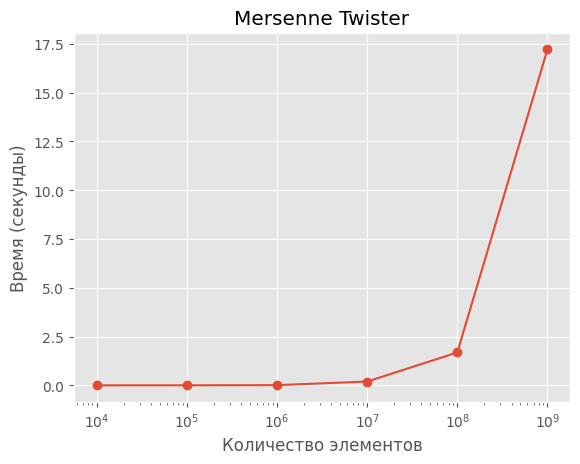

Минимальное время: 0.000204 секунд
Максимальное время: 17.2235 секунд


In [ ]:
mt_timing = timing[timing['Function'] == 'MersenneTwister']

plt.plot(mt_timing['n'], mt_timing['Time'], marker='o', linestyle='-')
plt.title('Mersenne Twister')
plt.xlabel('Количество элементов')
plt.ylabel('Время (секунды)')
plt.xscale('log')
plt.grid(True)
plt.show()

print(f"Минимальное время: {min(mt_timing['Time'])} секунд")
print(f"Максимальное время: {max(mt_timing['Time'])} секунд")

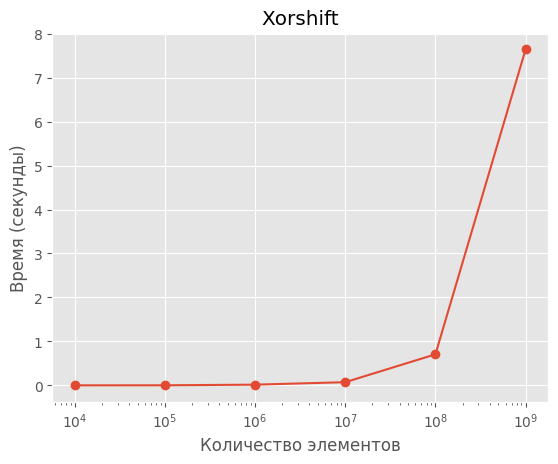

Минимальное время: 7.9e-05 секунд
Максимальное время: 7.64415 секунд


In [ ]:
xs_timing = timing[timing['Function'] == 'Xorshift']

plt.plot(xs_timing['n'], xs_timing['Time'], marker='o', linestyle='-')
plt.title('Xorshift')
plt.xlabel('Количество элементов')
plt.ylabel('Время (секунды)')
plt.xscale('log')
plt.grid(True)
plt.show()

print(f"Минимальное время: {min(xs_timing['Time'])} секунд")
print(f"Максимальное время: {max(xs_timing['Time'])} секунд")

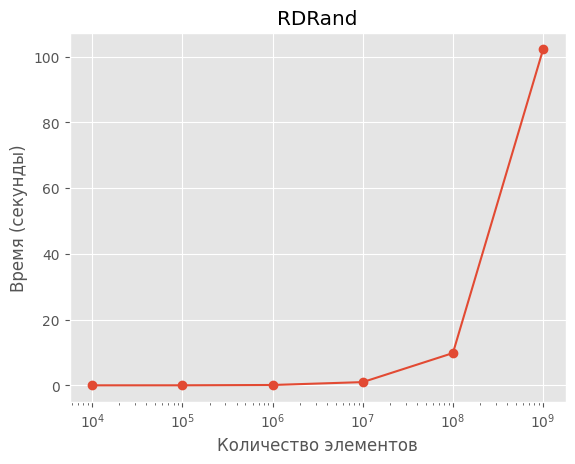

Минимальное время: 0.0020164 секунд
Максимальное время: 102.261 секунд


In [ ]:
rd_timing = timing[timing['Function'] == 'RDRand']

plt.plot(rd_timing['n'], rd_timing['Time'], marker='o', linestyle='-')
plt.title('RDRand')
plt.xlabel('Количество элементов')
plt.ylabel('Время (секунды)')
plt.xscale('log')
plt.grid(True)
plt.show()

print(f"Минимальное время: {min(rd_timing['Time'])} секунд")
print(f"Максимальное время: {max(rd_timing['Time'])} секунд")

In [ ]:
def read_from_file(filename):
    numbers = []
    with open(filename, 'r') as file:
        for line in file:
            number = int(line.strip())
            numbers.append(number)
    return numbers

lcg_cpp_sample = read_from_file('lcg_sample.txt')
mtw_cpp_sample = read_from_file('mt_sample.txt')
xor_cpp_sample = read_from_file('xorshift_sample.txt')
rd_cpp_sample = read_from_file('rdrand_sample.txt')

(Power_divergenceResult(statistic=99804.0, pvalue=0.6681564409028524), 100000)

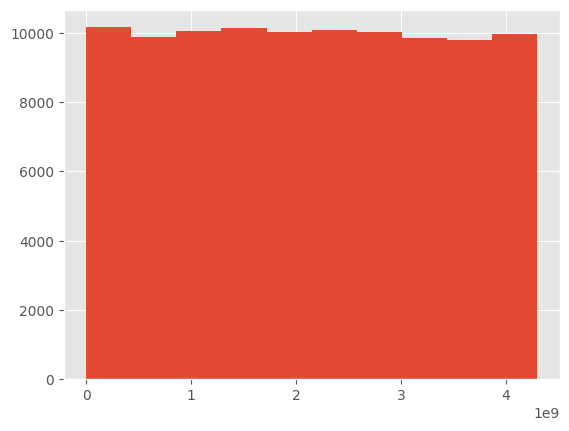

In [ ]:
plt.hist(lcg_cpp_sample)
is_uniformly_distributed(lcg_cpp_sample), len(np.unique(np.array(lcg_cpp_sample)))

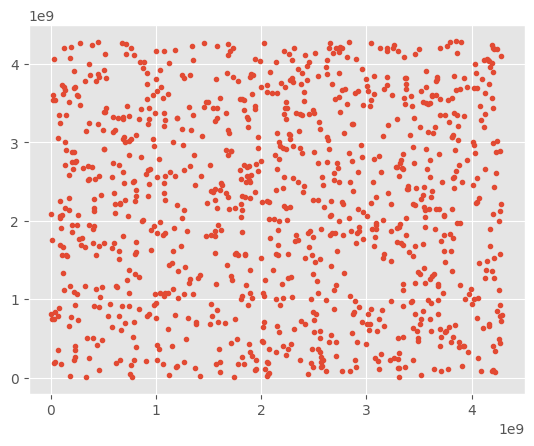

array([[1.        , 0.00309179],
       [0.00309179, 1.        ]])

In [ ]:
plt.plot(lcg_cpp_sample[:int(100000 / 100)], lcg_cpp_sample[1:int(100000 / 100) + 1], '.')
plt.show()
np.corrcoef(lcg_cpp_sample[:int(100000 / 100)], lcg_cpp_sample[1:int(100000 / 100) + 1])

(Power_divergenceResult(statistic=100099.99898000003, pvalue=0.4092432560207141),
 99999)

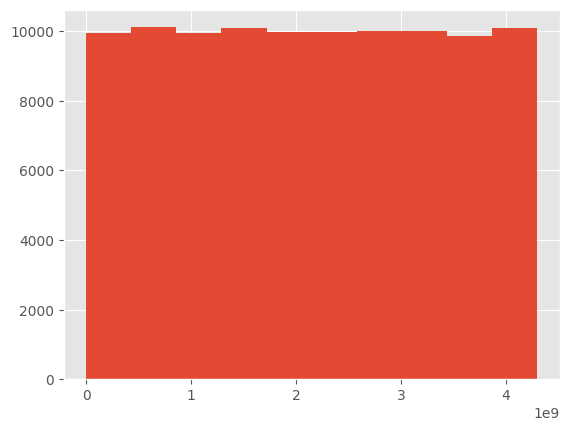

In [ ]:
plt.hist(mtw_cpp_sample)
is_uniformly_distributed(mtw_cpp_sample), len(np.unique(np.array(mtw_cpp_sample)))

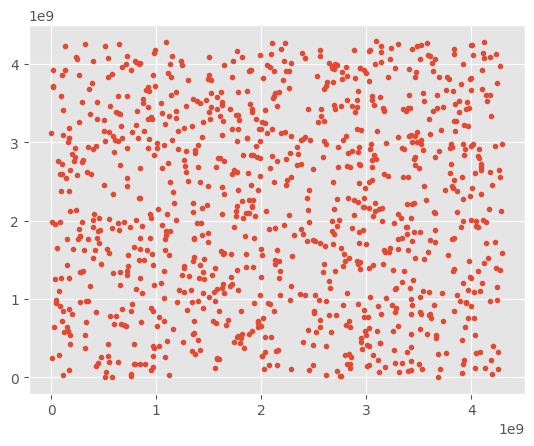

array([[1.        , 0.02694268],
       [0.02694268, 1.        ]])

In [ ]:
plt.plot(mtw_cpp_sample[:int(100000 / 100)], mtw_cpp_sample[1:int(100000 / 100) + 1], '.')
plt.show()
np.corrcoef(mtw_cpp_sample[:int(100000 / 100)], mtw_cpp_sample[1:int(100000 / 100) + 1])

(Power_divergenceResult(statistic=100560.0, pvalue=0.1049951244232371), 100000)

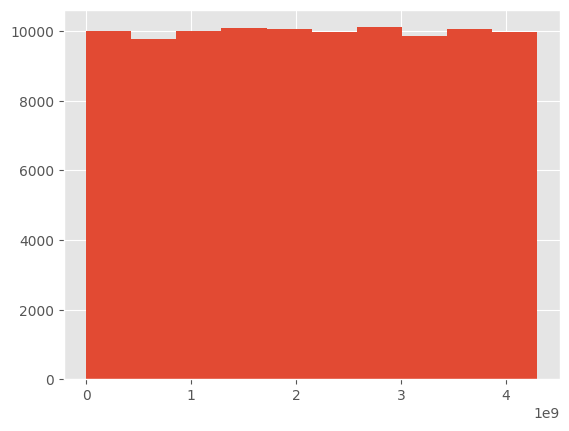

In [ ]:
plt.hist(xor_cpp_sample)
is_uniformly_distributed(xor_cpp_sample), len(np.unique(np.array(xor_cpp_sample)))

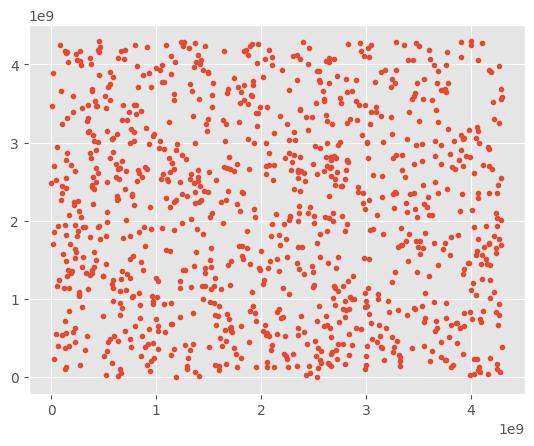

array([[ 1.        , -0.04484387],
       [-0.04484387,  1.        ]])

In [ ]:
plt.plot(xor_cpp_sample[:int(100000 / 100)], xor_cpp_sample[1:int(100000 / 100) + 1], '.')
plt.show()
np.corrcoef(xor_cpp_sample[:int(100000 / 100)], xor_cpp_sample[1:int(100000 / 100) + 1])

(Power_divergenceResult(statistic=100238.0, pvalue=0.2961561666319239), 100000)

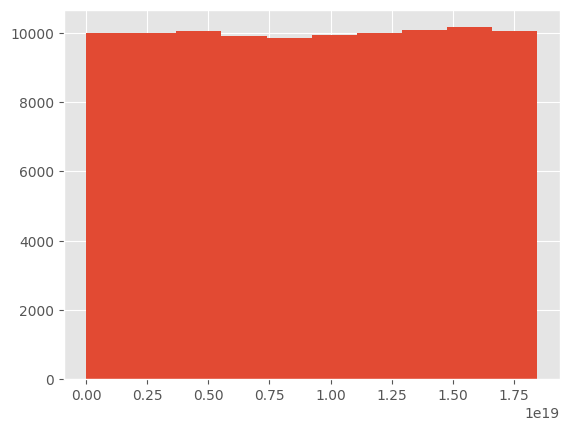

In [ ]:
plt.hist(rd_cpp_sample)
is_uniformly_distributed(rd_cpp_sample), len(np.unique(np.array(rd_cpp_sample)))

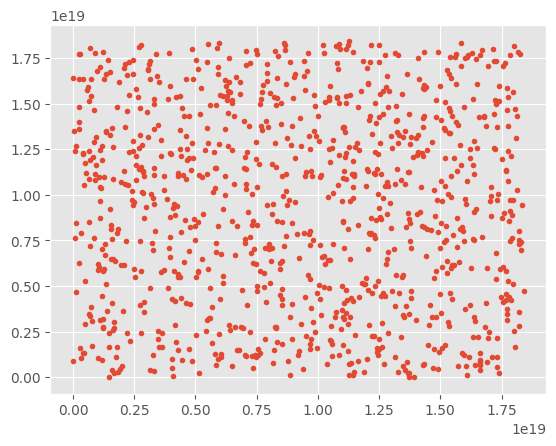

array([[ 1.        , -0.02029484],
       [-0.02029484,  1.        ]])

In [ ]:
plt.plot(rd_cpp_sample[:int(100000 / 100)], rd_cpp_sample[1:int(100000 / 100) + 1], '.')
plt.show()
np.corrcoef(rd_cpp_sample[:int(100000 / 100)], rd_cpp_sample[1:int(100000 / 100) + 1])